## 0. 토픽 모델링이란
- 문서 집합의 추상적인 주제(=토픽)를 발견하기 위한 통계적 모델.     
텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용된다

## 1. 잠재 의미 분석(Latent Semantic Analysis, LSA)
토픽 모델링을 위해 최적화되진 않았지만 토픽 모델링의 아이디어를 제공한 알고리즘임!      
DTM 안에 잠재된(latent) 의미를 이끌어내는 방법.

### 1) 특이값 분해 (Singular Value Decomposition, SVD)
A가 m x n 행렬일 때, 3개 행렬의 곱으로 분해하는 방법.      
$A=U \sum V^T$       
- $U$: m x m 직교행렬
- $V$: n x n 직교행렬
- $\sum$: m x n 직사각 대각행렬            
                 
이 때 대각 행렬의 원소의 값: 행렬 A의 특이값!(singular value)        
#### 직교행렬(Orthogonal matrix)
n x n 행렬 A에 대해 $A \times A^T = I, A^T \times A = I$ 를 만족하는 행렬 A를 직교행렬이라고 한다.

### 2) 절단된 SVD (Truncated SVD)
위의 SVD는 full SVD인데, LSA에서는 full SVD에서 일부 벡터들을 삭제시킨 절단된 SVD(truncated SVD)를 사용한다.
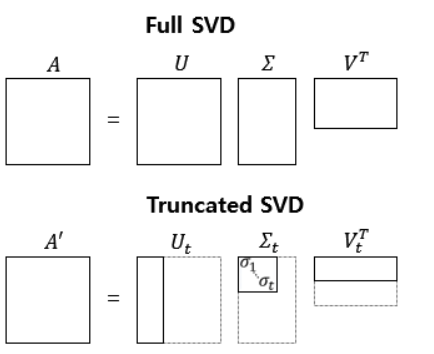
행렬 $\sum$의 대각 원소 중 상위값 t개만 남김 -> U행렬과 V행렬의 t열까지 남김.(=> 데이터의 차원이 줄어든다)      
여기서 __t는 토픽의 수에 대한 hyperparameter__(t가 크면 기존의 행렬 A에서 다양한 의미를 가져갈 수 있으나, t를 작게 잡아야 노이즈를 제거할 수 있음.)         
- 차원 감소 -> 계산 비용이 낮아짐.
- 설명력이 낮은 정보는 삭제하고 높은 정보를 남김(-> 기존 행렬에서 드러나지 않았던 심층적인 의미를 확인할 수 있다!)

### 3) 잠재 의미 분석 (Latent Semantic Analysis, LSA)
: DTM이나 TF-IDF 행렬에 truncated SVD를 사용해서 차원을 축소시키고 단어들의 잠재적인 의미를 이끌어낸다.

#### 실습
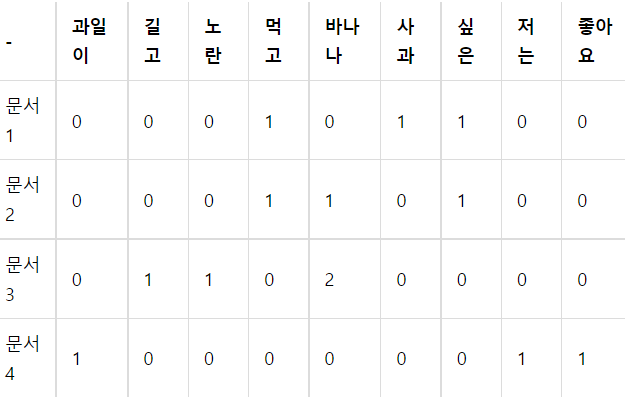

In [1]:
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

(4, 9)

#### full SVD 수행

In [11]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.round(2))
np.shape(U)

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]


(4, 4)

In [3]:
print(s.round(2))
np.shape(s)  

[2.69 2.05 1.73 0.77]


(4,)

대각 행렬이 아니라 특이값의 리스트를 반환함!

In [4]:
# 대각행렬 크기의 행렬을 생성하고 특이값을 넣어서 대각 행렬 만들기
S = np.zeros((4,9))    # 대각 행렬의 크기 4 x 9
S[:4, :4] = np.diag(s)  # 특이값을 대각 행렬에 넣기
print(S.round(2))
np.shape(S)  # 내림차순의 값을 가짐!

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


(4, 9)

In [5]:
print(VT.round(2))
np.shape(VT)

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


(9, 9)

=> U * S * VT 가 A와 같아야 함!       
맞는지 확인(allclose() 함수)

In [7]:
np.allclose(A, np.dot(np.dot(U,S),VT).round(2))

True

####  truncated SVD : 행렬 S 내의 특이값 중 상위 2개만 남기고 제거

In [12]:
S=S[:2, :2]   # 2개만 남기기
print(S.round(2))

[[2.69 0.  ]
 [0.   2.05]]


In [13]:
U=U[:,:2]    # 직교행렬 U에 대해 2개 열만 남기고 제거
print(U.round(2))

[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]


In [14]:
VT=VT[:2, :]  # VT에 대해 2개 행만 남기고 제거
print(VT.round(2))

[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


=> 값이 손실되었기 때문에 지금 가진 세개의 행렬로는 기존의 A 행렬을 복구할 수 없음.     
truncated SVD로 만들어진 행렬들의 곱 A_prime과 A를 비교해본다.

In [16]:
A_prime = np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.    0.    0.    0.  ]]


- 주로 기존에 0인 값은 0에 가까운 값, 1인 값은 1에 가까운 값이 나옴.
- 제대로 복구되지 않은 구간도 존재함.        
          
- 축소된 U: 4 x 2 = (문서 개수) x (토픽의 수 t) : 4개의 문서를 2개의 값으로 표현       
=> U의 각 행은 잠재 의미를 표현하기 위해 수치화된 각각의 문서 벡터!  
- 축소된 VT: 2 x 9 = (토픽의 수 t) x (단어 개수)       
=> VT의 각 열은 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터!

### 4) 실습 - 뉴스그룹 데이터
scikit learn의 twenty newsgrouops라고 불리는 20개의 다른 주제를 가진 뉴스 그룹 데이터 이용       
LSA를 이용해서 문서의 수를 원하는 토픽 수로 압축한 뒤 각 토픽당 가장 중요한 단어 5개를 출력한다.

#### 뉴스그룹 데이터에 대한 이해

In [17]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [18]:
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [19]:
# 뉴스그룹 데이터가 갖는 20개의 카테고리 출력
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


#### 텍스트 전처리
- 알파벳을 제외한 구두점, 숫자, 특수 문자 제거하기
- 짧은 단어는 유용한 정보가 없다고 가정하고 길이가 짧은 단어를 제거
- 모든 알파벳을 소문자로 변경(-> 단어 개수 줄이기)

In [20]:
news_df = pd.DataFrame({'document':documents})

# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")

# 길이가 3 이하인 단어 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

C:\Users\TFX5075G\AppData\Local\Temp/ipykernel_17324/724502115.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [21]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [22]:
# tokenize & 불용어 제거
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())  # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [23]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


#### TF-IDF 행렬 만들기
stopwords 제거를 위해 토큰화 작업을 수행했는데, TF-IDF 행렬 만들려면 다시 토큰화 작업을 역으로 취소해야 함(...) => 역토큰화(Detokenization)

In [24]:
# 역토큰화
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
news_df['clean_doc'] = detokenized_doc

news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

In [26]:
# TfidfVectorizer로 TF-IDF 행렬 만들기 (1000개로 제한해서 만들어보자)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
                            max_features=1000,   # 상위 1000개 단어 보존
                            max_df=0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape   # TF-IDF 행렬 크기 확인

(11314, 1000)

#### 토픽 모델링(Topic Modeling)
TF-IDF를 t=20인 truncated SVD로 분해

In [27]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized',
                        n_iter=100, random_state=122)

svd_model.fit(X)
len(svd_model.components_)    #svd_model.components_ : VT

20

In [28]:
np.shape(svd_model.components_)   # 토픽 수 x 단어 수

(20, 1000)

In [29]:
terms = vectorizer.get_feature_names()   # 단어 집합: 1000개의 단어가 저장됨

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10

### 5) LSA의 장단점
- 장점: 단어의 잠재적인 의미를 이끌어내서 문서의 유사도 계산 등에서 좋은 성능을 보임
- 단점: 이미 계산됨 LSA에 새 데이터를 추가하면 처음부터 다시 계산해야 됨.

## 2. 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
토픽 모델링의 대표적인 알고리즘!      
LDA는 문서들이 토픽들의 혼합으로 구성되어 있고, 토픽들은 확률 분포에 기반해 단어들을 생성한다고 가정한다.

### 1) LDA 개요
LDA는 각 문서의 토픽 분포와 각 토픽 내의 단어 분포를 추정한다.
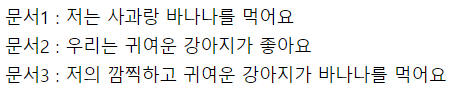
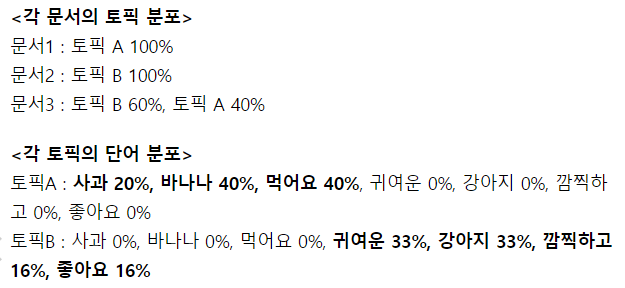

### 2) LDA 가정
LDA는 DTM 또는 TF-IDF 행렬을 입력으로 함 => 단어의 순서는 신경쓰지 않는다.       
각각의 문서는 다음과 같은 과정을 거쳐서 작성되었다고 가정한다.      
- 문서에 사용할 단어의 개수 N을 정한다.        
- 문서에 사용할 토픽의 혼합을 확률 분포에 기반하여 결정한다.      
예) 토픽이 2개일 때 강아지 토픽을 60%, 과일 토픽을 40%로 선택할 수 있다.      
- 문서에 사용할 단어를 정한다.
    - 토픽 분포에서 토픽 T를 확률적으로 고름(60% 확률로 강아지 선택 / 40% 확률로 과일 선택)
    - 선택한 토픽 T에서 단어의 출현 확률 분포에 기반하여 문서에 사용할 단어 선택(강아지 토픽을 선택했을 때 33% 확률로 강아지라는 단어를 선택)
    - 이 과정을 반복해서 문서를 완성한다.           
          
          
__LDA는 이러한 과정을 통해 문서가 작성되었다는 가정 하에 토픽을 추출 => 위 과정을 역으로 추적하는 역공학(reverse engineering) 과정이다!__

### 3) LDA 수행
1) 토픽 개수 k 결정       
토픽 개수 N을 입력받으면 N개의 토픽이 M개 전체 문서에 걸쳐 분포되어있다고 가정한다.        
2) 모든 단어를 k개 중 하나의 토픽에 할당    
=> 토픽은 단어 분포를 가지게 됨. 이 때 토픽을 랜덤으로 할당하기 때문에 틀린 상태         
3) 다음 과정을 반복
   - 어떤 단어 w는 잘못된 토픽에 할당되어 있지만 다른 단어들은 모두 올바른 토픽에 할당되어져 있는 상태라고 가정함.          
   => 두 가지 기준에 따라 토픽을 재할당         
   (1) p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율         
   (2) p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포
            
예)
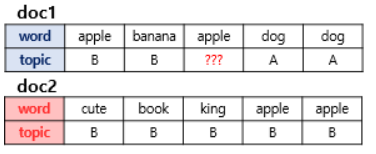
doc1의 세번째 단어인 apple의 토픽을 결정하고자 할 때        
- doc1 단어들이 어떤 토픽에 해당하는지: A와 B가 50대 50 비율이므로 apple은 둘 중 어디에도 속할 가능성이 있음.     
- 전체 문서에서 apple을 보면, apple은 B에 할당될 가능성이 높다!

### 4) LSA와 LDA의 차이
- LSA: DTM을 차원 숙초 -> 축소 차원에서 근접 단어들을 토픽으로 묶는다.
- LDA: 문서에 특정 토픽이 존재할 확률과 단어가 특정 토픽에 존재할 확률을 결합 확률로 추정하여 토픽 추출

### 5) LDA 실습 - gensim 라이브러리 활용        
LSA에서 사용한 20개의 다른 주제를 가진 뉴스 데이터를 사용한다.

#### 정수 인코딩과 단어 집합 만들기

In [1]:
# LSA 실습과 동일하게 데이터 전처리
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes'))
documents = dataset.data

news_df = pd.DataFrame({'document':documents})

# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")

# 길이가 3 이하인 단어 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

# tokenize & 불용어 제거
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())  # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

C:\Users\TFX5075G\AppData\Local\Temp/ipykernel_6504/1417137839.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [2]:
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

각 단어에 정수 인코딩 + 각 뉴스에서의 단어 빈도수 기록

In [3]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1])

c:\users\tfx5075g\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


(55,1) : 정수 인코딩 55번째로 할당된 단어가 두번째 뉴스에서 한번 등장한다!!

In [6]:
# 55로 인코딩된 단어 출력
print(dictionary[55])

accept


In [7]:
# 총 학습된 단어 개수 확인
len(dictionary)

64281

#### LDA 모델 훈련

In [8]:
import gensim
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS,
                                          id2word=dictionary, passes=15)  #passes: 알고리즘 동작 횟수

topics=ldamodel.print_topics(num_words=4) # 토픽별 단어 출력

for topic in topics:
    print(topic)

(0, '0.009*"ground" + 0.009*"engine" + 0.009*"char" + 0.008*"power"')
(1, '0.018*"gordon" + 0.017*"pitt" + 0.016*"banks" + 0.015*"surrender"')
(2, '0.017*"would" + 0.012*"people" + 0.011*"like" + 0.010*"think"')
(3, '0.028*"picture" + 0.016*"mask" + 0.015*"sleeve" + 0.007*"civic"')
(4, '0.016*"health" + 0.013*"guns" + 0.011*"medical" + 0.009*"crime"')
(5, '0.017*"jesus" + 0.010*"christian" + 0.010*"bible" + 0.008*"church"')
(6, '0.016*"cubs" + 0.010*"lost" + 0.010*"phillies" + 0.010*"fallacy"')
(7, '0.012*"mail" + 0.010*"please" + 0.010*"send" + 0.010*"list"')
(8, '0.011*"nist" + 0.008*"ncsl" + 0.008*"outlets" + 0.008*"tower"')
(9, '0.025*"contest" + 0.022*"remark" + 0.007*"obfuscate" + 0.006*"unto"')
(10, '0.039*"pain" + 0.011*"syndrome" + 0.010*"brain" + 0.010*"cure"')
(11, '0.012*"available" + 0.010*"version" + 0.009*"software" + 0.009*"image"')
(12, '0.013*"pitcher" + 0.013*"francis" + 0.013*"liar" + 0.008*"nolan"')
(13, '0.035*"space" + 0.014*"nasa" + 0.010*"center" + 0.010*"resea

#### LDA 시각화

In [12]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)
vis

c:\users\tfx5075g\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.267619 -0.035252       1        1  27.478391
17    -0.240236  0.124396       2        1  12.115897
11    -0.208875  0.195319       3        1   8.366419
14    -0.177043 -0.086524       4        1   6.700531
19    -0.165414  0.003216       5        1   6.699969
5     -0.171571 -0.044646       6        1   5.957016
7     -0.113377  0.013454       7        1   5.883367
16    -0.103623 -0.234111       8        1   5.729549
18    -0.044613 -0.139003       9        1   4.947666
13    -0.050799 -0.034518      10        1   3.812739
15    -0.104923  0.208145      11        1   3.362711
0     -0.019369  0.084790      12        1   2.998018
4      0.015357 -0.203079      13        1   2.828260
8      0.217896  0.022995      14        1   0.683638
9      0.231241  0.021061      15        1   0.563594
1      0.235855  0.018407      16        1   0.483681
6      0.242271  0.018531      17        1   0.417703
10     0.245152  0.012389      18        1   0.344829
3      0.233412  0.034279      19        1   0.327156
12     0.246275  0.020151      20        1   0.298865, topic_info=             Term         Freq        Total Category  logprob  loglift
282          file  1704.000000  1704.000000  Default  30.0000  30.0000
1883        space  1354.000000  1354.000000  Default  29.0000  29.0000
1657      program  1610.000000  1610.000000  Default  28.0000  28.0000
80         people  4383.000000  4383.000000  Default  27.0000  27.0000
218         jesus   967.000000   967.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
9404         anal     7.701959     8.861878  Topic20  -5.9151   5.6726
4805   adjustable    10.252408    14.880014  Topic20  -5.6290   5.4404
4234       richer     9.592933    13.657557  Topic20  -5.6955   5.4597
3679         risc    13.091281    34.536601  Topic20  -5.3846   4.8429
6465  instruction     9.779150    48.337375  Topic20  -5.6763   4.2150

[1157 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
22398      2  0.353430  accelerators
22398     18  0.610470  accelerators
519        2  0.313994        access
519        3  0.113534        access
519        5  0.471877        access
...      ...       ...           ...
514       10  0.069498         years
514       12  0.001336         years
514       13  0.058137         years
12011     13  0.988151         yeast
23553      4  0.988571       zionist

[2728 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 18, 12, 15, 20, 6, 8, 17, 19, 14, 16, 1, 5, 9, 10, 2, 7, 11, 4, 13])

원: 각각의 토픽. 각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 뜻함.           
두 원이 겹치면 유사한 토픽!

#### 문서 별 토픽 분포 보기      
상위 5개 문서에 대해 토픽 분포 확인

In [15]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i == 5:
        break
    print(i, '번째 문서의 topic 비율: ', topic_list)

0 번째 문서의 topic 비율:  [(0, 0.12741941), (2, 0.3255029), (4, 0.019523455), (14, 0.15636297), (16, 0.3588796)]
1 번째 문서의 topic 비율:  [(0, 0.11629107), (2, 0.65253264), (5, 0.1593982), (14, 0.050702203)]
2 번째 문서의 topic 비율:  [(2, 0.43897545), (6, 0.01669172), (13, 0.01957664), (14, 0.48985687), (17, 0.02278231)]
3 번째 문서의 topic 비율:  [(2, 0.3367268), (14, 0.19787548), (17, 0.1311537), (19, 0.3215274)]
4 번째 문서의 topic 비율:  [(2, 0.30599344), (15, 0.08872624), (18, 0.5737895)]


0번째 문서에서 (14, 0.15636297) : 14번 토픽이 15.6%의 분포를 가진다!

In [16]:
# 위의 결과를 데이터 형식으로 출력
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    # 문서 번호, 해당 문서의 토픽 비중 한줄식 꺼내오기
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
    # 비중 높은 토픽순으로 정렬
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)   
    
        for j, (topic_num, prop_topic) in enumerate(doc): # 몇번 토픽인지 / 비중
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)    

In [17]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,16.0,0.3589,"[(0, 0.12741888), (2, 0.32547945), (4, 0.01952..."
1,1,2.0,0.6525,"[(0, 0.11629147), (2, 0.65253067), (5, 0.15924..."
2,2,14.0,0.4899,"[(2, 0.4389447), (6, 0.016691703), (13, 0.0195..."
3,3,2.0,0.3367,"[(2, 0.3366832), (14, 0.19788192), (17, 0.1311..."
4,4,18.0,0.5738,"[(2, 0.30591404), (15, 0.088798106), (18, 0.57..."
5,5,5.0,0.4683,"[(2, 0.31913978), (3, 0.1322705), (5, 0.468287..."
6,6,17.0,0.5257,"[(0, 0.2718596), (2, 0.17039503), (15, 0.02081..."
7,7,2.0,0.5209,"[(0, 0.1505776), (2, 0.5208902), (14, 0.314581..."
8,8,2.0,0.5209,"[(2, 0.5208671), (8, 0.36687917), (15, 0.08723..."
9,9,2.0,0.5084,"[(0, 0.15847382), (2, 0.50844425), (16, 0.0156..."


### 6) LDA 실습 2 - scikit learn 활용

In [1]:
import pandas as pd
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", filename="abcnews-date-text.csv")
data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False)

c:\users\tfx5075g\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
print(len(data))

1082168


In [3]:
print(data.head(5))

   publish_date                                      headline_text
0      20030219  aba decides against community broadcasting lic...
1      20030219     act fire witnesses must be aware of defamation
2      20030219     a g calls for infrastructure protection summit
3      20030219           air nz staff in aust strike for pay rise
4      20030219      air nz strike to affect australian travellers


In [4]:
# 뉴스 기사 제목 열을 별도로 저장
text = data[['headline_text']]
text.head(5)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


#### 텍스트 전처리

In [5]:
# 단어 토큰화
import nltk
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)
print(text.head(5))

                                       headline_text
0  [aba, decides, against, community, broadcastin...
1  [act, fire, witnesses, must, be, aware, of, de...
2  [a, g, calls, for, infrastructure, protection,...
3  [air, nz, staff, in, aust, strike, for, pay, r...
4  [air, nz, strike, to, affect, australian, trav...


C:\Users\TFX5075G\AppData\Local\Temp/ipykernel_10156/53555547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)


In [6]:
# stopwords 제거
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x:[word for word in x if word not in (stop)])

print(text.head(5))

                                       headline_text
0   [aba, decides, community, broadcasting, licence]
1    [act, fire, witnesses, must, aware, defamation]
2     [g, calls, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


C:\Users\TFX5075G\AppData\Local\Temp/ipykernel_10156/2665449557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda x:[word for word in x if word not in (stop)])


In [7]:
# 표제어 추출 : 3인칭 단수 표현을 1인칭으로 바꾸고, 과거형을 현재형으로 바꾼다.
from nltk.stem import WordNetLemmatizer
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

                                       headline_text
0       [aba, decide, community, broadcast, licence]
1      [act, fire, witness, must, aware, defamation]
2      [g, call, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


C:\Users\TFX5075G\AppData\Local\Temp/ipykernel_10156/515528035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


In [8]:
# 길이가 3 이하인 단어 제거
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word)>3])
print(tokenized_doc[:5])

0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object


#### TF-IDF 행렬 만들기
TfidfVectorizer는 토큰화가 되어있지 않은 텍스트 데이터를 사용하므로 역토큰화 작업을 수행한다.

In [10]:
# 역토큰화
detokenized_doc=[]
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
text['headline_text'] = detokenized_doc

text['headline_text'][:5]

C:\Users\TFX5075G\AppData\Local\Temp/ipykernel_10156/589100870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = detokenized_doc


0       decide community broadcast licence
1       fire witness must aware defamation
2    call infrastructure protection summit
3                   staff aust strike rise
4      strike affect australian travellers
Name: headline_text, dtype: object

In [11]:
# TF-IDF 행렬 만들기
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000) #상위 1000개의 단어 보존
X = vectorizer.fit_transform(text['headline_text'])
X.shape

(1082168, 1000)

#### 토픽 모델링

In [12]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',
                                     random_state=777, max_iter=1)

lda_top = lda_model.fit_transform(X)

In [13]:
print(lda_model.components_)
print(lda_model.components_.shape)

[[1.00001533e-01 1.00001269e-01 1.00004179e-01 ... 1.00006124e-01
  1.00003111e-01 1.00003064e-01]
 [1.00001199e-01 1.13513398e+03 3.50170830e+03 ... 1.00009349e-01
  1.00001896e-01 1.00002937e-01]
 [1.00001811e-01 1.00001151e-01 1.00003566e-01 ... 1.00002693e-01
  1.00002061e-01 7.53381835e+02]
 ...
 [1.00001065e-01 1.00001689e-01 1.00003278e-01 ... 1.00006721e-01
  1.00004902e-01 1.00004759e-01]
 [1.00002401e-01 1.00000732e-01 1.00002989e-01 ... 1.00003517e-01
  1.00001428e-01 1.00005266e-01]
 [1.00003427e-01 1.00002313e-01 1.00007340e-01 ... 1.00003732e-01
  1.00001207e-01 1.00005153e-01]]
(10, 1000)


In [14]:
terms = vectorizer.get_feature_names() # 단어 집합(1000개의 단어)

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('government', 8725.19), ('sydney', 8393.29), ('queensland', 7720.12), ('change', 5874.27), ('home', 5674.38)]
Topic 2: [('australia', 13691.08), ('australian', 11088.95), ('melbourne', 7528.43), ('world', 6707.7), ('south', 6677.03)]
Topic 3: [('death', 5935.06), ('interview', 5924.98), ('kill', 5851.6), ('jail', 4632.85), ('life', 4275.27)]
Topic 4: [('house', 6113.49), ('2016', 5488.19), ('state', 4923.41), ('brisbane', 4857.21), ('tasmania', 4610.97)]
Topic 5: [('court', 7542.74), ('attack', 6959.64), ('open', 5663.0), ('face', 5193.63), ('warn', 5115.01)]
Topic 6: [('market', 5545.86), ('rural', 5502.89), ('plan', 4828.71), ('indigenous', 4223.4), ('power', 3968.26)]
Topic 7: [('charge', 8428.8), ('election', 7561.63), ('adelaide', 6758.36), ('make', 5658.99), ('test', 5062.69)]
Topic 8: [('police', 12092.44), ('crash', 5281.14), ('drug', 4290.87), ('beat', 3257.58), ('rise', 2934.92)]
Topic 9: [('fund', 4693.03), ('labor', 4047.69), ('national', 4038.68), ('council', 40